In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import missingno as msno
sns.set_style("darkgrid")

import matplotlib as mpl

mpl.rcParams['axes.unicode_minus'] = False
plt.rcParams["font.family"] = "Malgun Gothic"
plt.rcParams["font.size"] = 10

import plotly.graph_objects as go
import plotly.express as px

import pickle
import os
import gc

os.chdir("./제6회 L.POINT Big Data Competition/")

def resumetable(df):
    print(f"DataSet Shape : {df.shape}")
    summary = pd.DataFrame(df.dtypes, columns={'dtypes'})
    summary = summary.reset_index()
    summary["Name"] = summary["index"]
    summary = summary[["Name","dtypes"]]
    summary['Missing'] = df.isnull().sum().values
    summary['Unique'] = df.nunique().values
    summary['First Value'] = df.loc[0].values
    summary['Second Value'] = df.loc[1].values
    summary['Third Value'] = df.loc[2].values
    
    for name in summary['Name'].value_counts().index:
        summary.loc[summary['Name'] == name, "Entropy"] = round(stats.entropy(df[name].value_counts(normalize = True), base=2),2)
        
    return summary

def reduce_mem_usage(df, verbose=True):
    numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
    start_mem = df.memory_usage().sum() / 1024**2    
    for col in df.columns:
        col_type = df[col].dtypes
        if col_type in numerics:
            c_min = df[col].min()
            c_max = df[col].max()
            if str(col_type)[:3] == 'int':
                if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
                    df[col] = df[col].astype(np.int8)
                elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
                    df[col] = df[col].astype(np.int16)
                elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
                    df[col] = df[col].astype(np.int32)
                elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
                    df[col] = df[col].astype(np.int64)  
            else:
                if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
                    df[col] = df[col].astype(np.float16)
                elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
                    df[col] = df[col].astype(np.float32)
                else:
                    df[col] = df[col].astype(np.float64)    
    end_mem = df.memory_usage().sum() / 1024**2
    if verbose: print('Mem. usage decreased to {:5.2f} Mb ({:.1f}% reduction)'.format(end_mem, 100 * (start_mem - end_mem) / start_mem))
    return df

from IPython.core.display import HTML

def multi_table(table_list):
    ''' Acceps a list of IpyTable objects and returns a table which contains each IpyTable in a cell
    '''
    return HTML(
        '<table><tr style="background-color:white;">' + 
        ''.join(['<td>' + table._repr_html_() + '</td>' for table in table_list]) +
        '</tr></table>'
    )

In [3]:
tmp_df1 = pd.read_csv("action_counts_by_clnt_id.csv")
tmp_df2 = pd.read_csv("purchase_num_by_category.csv")

In [3]:
online_df = pd.read_csv("merged_onilne_df.csv")

In [3]:
purchase_user = online_df[online_df.action_type==6].clnt_id.unique()

In [4]:
df_g1 = online_df[online_df.clnt_id.isin(online_df[online_df.action_type==6].clnt_id.unique())]
df_g2 = online_df[~online_df.clnt_id.isin(online_df[online_df.action_type==6].clnt_id.unique())]

In [112]:
online_df.shape, df_g1.shape, df_g2.shape

((3269795, 30), (2603840, 30), (665955, 30))

In [113]:
online_df.shape[0] == df_g1.shape[0] + df_g2.shape[0]

True

#### 행동패턴 - action_type의 순서에 따른 소비패턴의 차이

In [ ]:
online_df

#### 행동패턴 - 요일,시간대별 action_type분포에 따른 소비패턴의 차이

In [5]:
online_df.drop_duplicates(["clnt_id","sess_id"], keep = "first")

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,min,trans_seq,pd_c,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3
0,1,1,1,0,A01,20190911,16:14,11880,NaN,과일선물세트,...,14,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN
3,1,2,1,0,A01,20190922,14:09,41584,NaN,초등가을잠바,...,9,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN
10,2,1,1,0,A03,20190728,23:35,39532,NaN,레쓰비,...,35,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
53,2,2,1,5,A03,20190729,07:27,13980,NaN,NaN,...,27,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
59,2,3,1,5,A03,20190729,09:07,60986,NaN,NaN,...,7,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
64,2,4,1,1,A03,20190729,09:55,4019,NaN,NaN,...,55,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
67,2,5,1,5,A03,20190729,16:06,2661,NaN,NaN,...,6,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
69,2,6,1,5,A03,20190730,23:23,14982,NaN,NaN,...,23,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
71,2,7,1,0,A03,20190731,18:35,90972,NaN,레쓰비,...,35,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN
78,2,8,1,5,A03,20190731,20:31,2184,NaN,NaN,...,31,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN


#### 행동패턴 - 주접속시간대, 접속기기, 유입채널에 따른 소비패턴 차이

In [4]:
tmp3 = online_df.drop_duplicates(["clnt_id","sess_id"], keep = "first")
tmp3["time_range"] = np.where(tmp3.hour.isin(range(1,9)), "dawn",
        np.where(tmp3.hour.isin(range(9,19)), "daytime", "night"))
tmp3["time_range"] = tmp3.time_range.astype(str)

c:\python37\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\python37\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [5]:
tmp3["is_holiday"] = np.where(tmp3.weekday.isin([0,1,2,3,4]), 0, 1)

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [8]:
tmp3[["clnt_id","time_range","is_holiday"]]

,clnt_id,time_range,is_holiday
0,1,daytime,0
3,1,daytime,1
10,2,night,1
53,2,dawn,0
59,2,daytime,0
64,2,daytime,0
67,2,daytime,0
69,2,night,0
71,2,daytime,0
78,2,night,0


In [6]:
tmp3.groupby(["time_range","is_holiday"]).size().reset_index()

,time_range,is_holiday,0
0,dawn,0,33926
1,dawn,1,11688
2,daytime,0,160993
3,daytime,1,50455
4,night,0,79859
5,night,1,30228


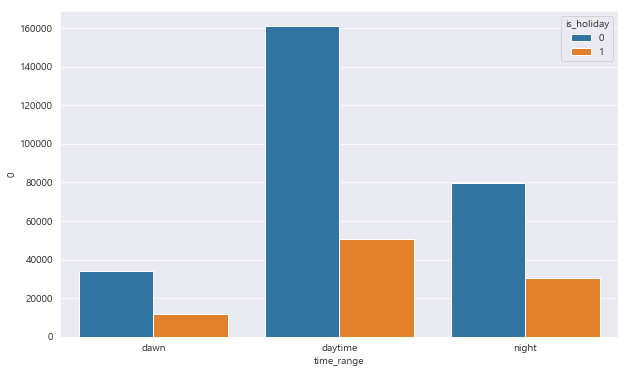

In [7]:
plt.figure(figsize = (10,6))
sns.barplot(x=tmp3.groupby(["time_range","is_holiday"]).size().reset_index()['time_range'],
       y=tmp3.groupby(["time_range","is_holiday"]).size().reset_index()[0],
       hue = tmp3.groupby(["time_range","is_holiday"]).size().reset_index()["is_holiday"])

In [9]:
tmp_pivot = tmp3.groupby(["clnt_id","is_holiday"]).size().reset_index().pivot("clnt_id","is_holiday",0).fillna(0)

In [10]:
weekday_users = tmp_pivot[(tmp_pivot[0] - tmp_pivot[1])>0].index
holiday_users = tmp_pivot[(tmp_pivot[0] - tmp_pivot[1])<=0].index

In [11]:
tmp3.loc[tmp3.clnt_id.isin(weekday_users),"shopping_day"] = "weekday"
tmp3.loc[tmp3.clnt_id.isin(holiday_users),"shopping_day"] = "holiday"

c:\python37\lib\site-packages\pandas\core\indexing.py:362: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy

c:\python37\lib\site-packages\pandas\core\indexing.py:543: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



In [12]:
tmp_pre_patt = tmp3.groupby(["clnt_id","shopping_day","time_range"]).size().reset_index().sort_values(by = ["clnt_id",0]).drop_duplicates("clnt_id", keep ="last")

In [13]:
tmp_pre_patt

,clnt_id,shopping_day,time_range,0
0,1,holiday,daytime,2
2,2,weekday,daytime,8
4,3,weekday,night,1
5,4,weekday,daytime,1
6,5,weekday,daytime,1
7,6,weekday,daytime,2
8,7,weekday,daytime,4
10,8,weekday,daytime,2
12,9,weekday,daytime,27
14,10,weekday,dawn,1


In [13]:
def get_pattern(shopping_day, time_range):
    c1 = shopping_day
    c2 = time_range
    
    if (c1=="weekday") & (c2=="dawn"):
        return 1
    elif (c1=="weekday") & (c2=="daytime"):
        return 2
    elif (c1=="weekday") & (c2=="night"):
        return 3
    elif (c1=="holiday") & (c2=="dawn"):
        return 4
    elif (c1=="holiday") & (c2=="daytime"):
        return 5
    elif (c1=="holiday") & (c2=="night"):
        return 6

In [14]:
tmp_pre_patt.head()

,clnt_id,shopping_day,time_range,0
0,1,holiday,daytime,2
2,2,weekday,daytime,8
4,3,weekday,night,1
5,4,weekday,daytime,1
6,5,weekday,daytime,1


In [16]:
tmp_pre_patt

In [17]:
tmp_pre_patt["pattern"] = tmp_pre_patt.apply(lambda x : get_pattern(x["shopping_day"], x["time_range"]), axis=1)

In [18]:
tmp3 = tmp3.merge(tmp_pre_patt[["clnt_id","pattern"]], how = "left")

In [20]:
main_access_time = tmp3.drop_duplicates("clnt_id", keep="first")[["clnt_id","pattern"]].reset_index(drop = True)

In [22]:
main_access_time.to_csv("main_access_time_2.csv", index = False)

In [26]:
tmp_pre_patt[tmp_pre_patt[0] != 1].pattern.value_counts()

2    17711
3     7448
5     4205
6     2854
1     1437
4      478
Name: pattern, dtype: int64

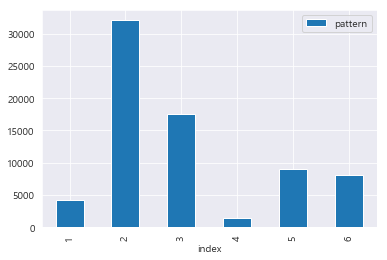

In [39]:
main_access_time.pattern.value_counts().reset_index().sort_values(by = 'index').set_index('index').plot(kind = 'bar')

##### 패턴별 소비형태  - 구매율 및 구매시 최초 검색이후 구매까지 경과 시간

In [100]:
tmp_31 = online_df.merge(tmp_pre_patt[["clnt_id","pattern"]], how = "left")

In [101]:
# 구매율 => trans_id수/sess_id수

#clnt_id별 sess_id수
sess_id_count = tmp_31.groupby(['clnt_id',"sess_id"]).size().reset_index().groupby("clnt_id").size().reset_index()

#clnt_id별 trans_id수
trans_id_count = tmp_31[tmp_31.action_type==6].groupby(["clnt_id","sess_id"]).size().reset_index().groupby("clnt_id").size().reset_index()

In [102]:
sess_id_count.columns = ["clnt_id", "sess_id_count"]
trans_id_count.columns = ["clnt_id", "trans_id_count"]

In [103]:
purchase_rate = sess_id_count.merge(trans_id_count, how = "left").fillna(0)

In [104]:
purchase_rate["purchase_rate"] = purchase_rate.trans_id_count / purchase_rate.sess_id_count

In [106]:
purchase_rate.head()

,clnt_id,sess_id_count,trans_id_count,purchase_rate
0,1,2,0.0,0.0
1,2,20,4.0,0.2
2,3,1,0.0,0.0
3,4,1,1.0,1.0
4,5,1,0.0,0.0


In [107]:
tmp_31 = tmp_31.merge(purchase_rate[["clnt_id", "purchase_rate"]], how = "left")

In [116]:
tmp_31[tmp_31.clnt_id.isin(purchase_user)].drop_duplicates(["clnt_id","sess_id"], keep = "first").groupby(["pattern"]).describe()[["purchase_rate"]]

purchase_rate                                                    \
                count      mean       std       min       25%       50%   
pattern                                                                   
1              4625.0  0.294919  0.286653  0.021739  0.100000  0.178571   
2            163871.0  0.190601  0.174973  0.004950  0.081181  0.142857   
3             38048.0  0.222876  0.223246  0.010101  0.074489  0.148148   
4               702.0  0.443020  0.353014  0.027027  0.125000  0.333333   
5              9922.0  0.345193  0.270720  0.020833  0.153846  0.250000   
6              7072.0  0.366657  0.288427  0.034483  0.142857  0.250000   

                        
              75%  max  
pattern                 
1        0.333333  1.0  
2        0.239130  1.0  
3        0.272727  1.0  
4        0.727273  1.0  
5        0.500000  1.0  
6        0.500000  1.0

In [122]:
tmp_31[~tmp_31.clnt_id.isin(purchase_user)].drop_duplicates(["clnt_id","sess_id"], keep = "first").groupby("pattern").size()

pattern
1     8498
2    67219
3    36213
4     2258
5    14822
6    13899
dtype: int64

In [136]:
tmp_31[(tmp_31.clnt_id.isin(purchase_user)) & (tmp_31.action_type == 6)].drop_duplicates(["clnt_id","action_type"], keep = "first").fillna("unknown").groupby(["pattern","clac_nm1"]).size().reset_index().sort_values(by = ["pattern",0], ascending = False)[tmp_31[(tmp_31.clnt_id.isin(purchase_user)) & (tmp_31.action_type == 6)].drop_duplicates(["clnt_id","action_type"], keep = "first").fillna("unknown").groupby(["pattern","clac_nm1"]).size().reset_index().sort_values(by = ["pattern",0], ascending = False)[0] > 20]

,pattern,clac_nm1,0
275,6,unknown,1473
274,6,Women's Clothing,58
237,6,Cosmetics / Beauty Care,48
264,6,Sport Fashion,30
240,6,Fashion Accessories,24
228,5,unknown,1618
227,5,Women's Clothing,66
197,5,Fruits,65
191,5,Cosmetics / Beauty Care,57
209,5,Meats,38


In [72]:
%whos DataFrame

Variable         Type         Data/Info
---------------------------------------
buying_sess_df   DataFrame            clnt_id  sess_id <...>[367149 rows x 3 columns]
df_g1            DataFrame             clnt_id  sess_id<...>603840 rows x 30 columns]
df_g2            DataFrame             clnt_id  sess_id<...>665955 rows x 30 columns]
online_df        DataFrame             clnt_id  sess_id<...>269795 rows x 31 columns]
tmp_32           DataFrame             clnt_id  sess_id<...>198411 rows x 31 columns]
tmp_sub1         DataFrame             clnt_id  sess_id<...>[47407 rows x 31 columns]
tmp_sub2         DataFrame             clnt_id  sess_id<...>[47407 rows x 31 columns]


In [128]:
tmp_31[(tmp_31.clnt_id.isin(purchase_user)) & (tmp_31.action_type == 6)].drop_duplicates(["clnt_id","action_type"], keep = "first")[["clac_nm1"]].fillna("unknown").clac_nm1.value_counts()

unknown                                      14851
Fruits                                         599
Women's Clothing                               529
Vegetables                                     464
Meats                                          393
Cosmetics / Beauty Care                        347
Fashion Accessories                            299
Dairy Products                                 281
Chilled Foods                                  250
Sport Fashion                                  222
Substitute Foods                               189
Frozen Foods                                   174
Underwear / Socks and Hosiery / Homewear       166
Beverages                                      160
Detergents / Hygiene Goods                     154
Health Foods                                   151
Snack Foods                                    146
Personal Care                                  138
Spices / Seasonings                            107
Grains                         

In [137]:
tmp_31[(tmp_31.clnt_id.isin(purchase_user))].drop_duplicates("")

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,pd_c,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3,pattern,purchase_rate
10,2,1,1,0,A03,20190728,23:35,39532,NaN,레쓰비,...,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,2,0.20
11,2,1,2,1,A03,20190728,23:35,47232,NaN,NaN,...,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,2,0.20
12,2,1,3,2,A03,20190728,23:35,48087,NaN,NaN,...,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,2,0.20
13,2,1,4,0,A03,20190728,23:35,62794,NaN,레쓰비,...,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,2,0.20
14,2,1,5,0,A03,20190728,23:36,104074,NaN,레쓰비,...,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,2,0.20
15,2,1,6,3,A03,20190728,23:36,127807,NaN,NaN,...,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,2,0.20
16,2,1,7,5,A03,20190728,23:36,136325,NaN,NaN,...,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,2,0.20
17,2,1,8,5,A03,20190728,23:37,150334,NaN,NaN,...,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,2,0.20
18,2,1,9,0,A03,20190728,23:37,163423,NaN,레쓰비,...,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,2,0.20
19,2,1,10,1,A03,20190728,23:37,174500,NaN,NaN,...,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,2,0.20


In [138]:
#최초 검색으로 부터 얼마 이후에 구매를 했는가

In [140]:
user_indices = online_df[online_df.action_type==6].clnt_id.unique()

In [142]:
purchaser = tmp_31[tmp_31.clnt_id.isin(user_indices)]

In [146]:
purchaser[purchaser.action_type.isin([0,1,6])].drop_duplicates(["clnt_id","sess_id","action_type"], keep = "first")

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,pd_c,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3,pattern,purchase_rate
10,2,1,1,0,A03,20190728,23:35,39532,NaN,레쓰비,...,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,2,0.200000
11,2,1,2,1,A03,20190728,23:35,47232,NaN,NaN,...,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,2,0.200000
46,2,1,37,6,A03,20190728,23:47,791905,62037.0,NaN,...,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,2,0.200000
64,2,4,1,1,A03,20190729,09:55,4019,NaN,NaN,...,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,2,0.200000
71,2,7,1,0,A03,20190731,18:35,90972,NaN,레쓰비,...,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,2,0.200000
72,2,7,2,1,A03,20190731,18:35,92170,NaN,NaN,...,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,2,0.200000
79,2,8,2,0,A03,20190731,20:31,7731,NaN,초밥,...,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,2,0.200000
80,2,8,3,1,A03,20190731,20:32,34310,NaN,NaN,...,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,2,0.200000
145,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,...,92,1800.0,1.0,F,30,Beverages,Coffee Drinks,Coffee Drinks,2,0.200000
150,2,9,1,1,A03,20190801,02:47,47867,NaN,NaN,...,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,2,0.200000


In [149]:
def is_buying_sess(clnt_id, sess_id):
    tmp_df = online_df[(online_df.clnt_id == clnt_id) & (online_df.sess_id == sess_id)]
    if tmp_df[tmp_df.action_type==6].shape[0] > 0:
        return 1
    else:
        return 0

In [154]:
# buying_sess_list = online_df[["clnt_id","sess_id"]].drop_duplicates(["clnt_id","sess_id"], keep = "first").reset_index(drop=True).apply(lambda x : is_buying_sess(x["clnt_id"],x["sess_id"]), axis=1)

In [156]:
# with open('buying_sess_list.pickle', 'wb') as f:
#     pickle.dump(buying_sess_list, f, protocol=pickle.HIGHEST_PROTOCOL)

In [6]:
with open('buying_sess_list.pickle', 'rb') as f:
    buying_sess_list = pickle.load(f)

In [9]:
online_df.drop_duplicates(["clnt_id","sess_id"], keep = "first")[["clnt_id","sess_id"]]

,clnt_id,sess_id
0,1,1
3,1,2
10,2,1
53,2,2
59,2,3
64,2,4
67,2,5
69,2,6
71,2,7
78,2,8


In [12]:
buying_sess_df = pd.concat([online_df.drop_duplicates(["clnt_id","sess_id"], keep = "first")[["clnt_id","sess_id"]].reset_index(drop=True),pd.DataFrame(buying_sess_list)], axis=1)

In [15]:
buying_sess_df.columns = ["clnt_id","sess_id","is_buying"]

In [18]:
online_df = online_df.merge(buying_sess_df, how="left", on = ["clnt_id","sess_id"])

In [22]:
tmp_32 = online_df[online_df.is_buying == 1].drop_duplicates(["clnt_id","sess_id","action_type"], keep = 'first')

In [24]:
tmp_sub1 = tmp_32.drop_duplicates(["clnt_id","sess_id"], keep = 'first')
tmp_sub2 = tmp_32.drop_duplicates(["clnt_id","sess_id"], keep = 'last')

In [29]:
pd.options.display.max_columns = 50

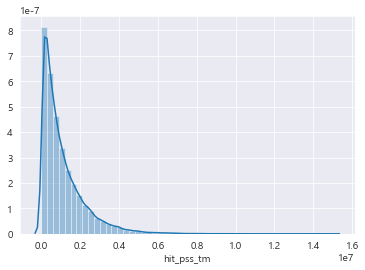

In [36]:
sns.distplot(tmp_32[tmp_32.action_type == 6].hit_pss_tm)

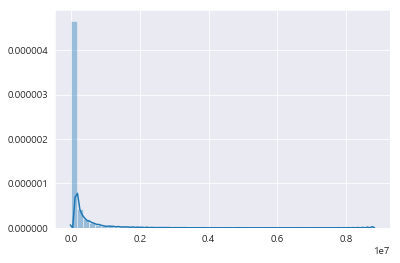

In [35]:
sns.distplot(tmp_32[tmp_32.action_type == 6].hit_pss_tm / tmp_32[tmp_32.action_type == 6].hit_seq)

In [25]:
tmp_sub1

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,...,trans_seq,pd_c,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3,is_buying
10,2,1,1,0,A03,20190728,23:35,39532,NaN,레쓰비,...,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,1
78,2,8,1,5,A03,20190731,20:31,2184,NaN,NaN,...,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,1
156,2,10,1,0,A03,20190801,21:55,15567,NaN,레쓰비175,...,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,1
235,2,19,1,2,A03,20190830,21:23,27542,NaN,NaN,...,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,1
275,4,1,1,0,A01,20190826,10:32,48117,NaN,아소방 1 1,...,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN,1
407,9,6,1,5,A03,20190708,13:19,129437,NaN,NaN,...,-1.0,-1,-1.0,-1.0,F,40,NaN,NaN,NaN,1
540,9,26,1,5,A03,20190904,21:17,5872,NaN,NaN,...,-1.0,-1,-1.0,-1.0,F,40,NaN,NaN,NaN,1
627,12,1,1,0,A01,20190718,10:08,5401,NaN,생수 2L,...,-1.0,-1,-1.0,-1.0,F,40,NaN,NaN,NaN,1
657,17,3,1,3,A03,20190730,23:56,19612,NaN,NaN,...,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN,1
741,19,1,1,6,A01,20190810,16:33,1377191,72882.0,NaN,...,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN,1


In [53]:
tmp_sub2.head(10)

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm,time,year,month,day,weekday,hour,min,trans_seq,pd_c,buy_am,buy_ct,clnt_gender,clnt_age,clac_nm1,clac_nm2,clac_nm3,is_buying
46,2,1,37,6,A03,20190728,23:47,791905,62037.0,NaN,55.0,872.0,DIRECT,NaN,2019-07-28 23:47:00,2019,7,28,6,23,47,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,1
145,2,8,68,6,A03,20190731,21:25,3251794,64691.0,NaN,85.0,3256.0,DIRECT,NaN,2019-07-31 21:25:00,2019,7,31,2,21,25,5.0,92,1800.0,1.0,F,30,Beverages,Coffee Drinks,Coffee Drinks,1
171,2,10,16,6,A03,20190801,22:00,306944,65505.0,NaN,23.0,353.0,DIRECT,NaN,2019-08-01 22:00:00,2019,8,1,3,22,0,1.0,92,9000.0,5.0,F,30,Beverages,Coffee Drinks,Coffee Drinks,1
254,2,19,18,1,A03,20190830,22:00,2242420,NaN,NaN,29.0,2252.0,DIRECT,NaN,2019-08-30 22:00:00,2019,8,30,4,22,0,-1.0,-1,-1.0,-1.0,F,30,NaN,NaN,NaN,1
276,4,1,2,6,A01,20190826,10:38,402600,85046.0,NaN,115.0,950.0,unknown,mobile_app,2019-08-26 10:38:00,2019,8,26,0,10,38,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN,1
433,9,6,27,6,A03,20190708,13:48,1853427,45242.0,NaN,40.0,1903.0,DIRECT,NaN,2019-07-08 13:48:00,2019,7,8,0,13,48,8.0,515,6990.0,1.0,F,40,Frozen Foods,Frozen Instant Foods,Frozen Dumplings,1
565,9,26,26,6,A03,20190904,21:36,1144847,92448.0,NaN,37.0,1247.0,DIRECT,NaN,2019-09-04 21:36:00,2019,9,4,2,21,36,6.0,348,2490.0,1.0,F,40,Dairy Products,Milk,Functional Milk,1
628,12,1,2,6,A01,20190718,10:10,133918,54099.0,NaN,30.0,139.0,unknown,mobile_app,2019-07-18 10:10:00,2019,7,18,3,10,10,-1.0,-1,-1.0,-1.0,F,40,NaN,NaN,NaN,1
719,17,3,63,6,A03,20190731,01:07,3976957,64325.0,NaN,87.0,4012.0,DIRECT,NaN,2019-07-31 01:07:00,2019,7,31,2,1,7,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN,1
741,19,1,1,6,A01,20190810,16:33,1377191,72882.0,NaN,157.0,1485.0,unknown,mobile_web,2019-08-10 16:33:00,2019,8,10,5,16,33,-1.0,-1,-1.0,-1.0,unknown,unknown,NaN,NaN,NaN,1


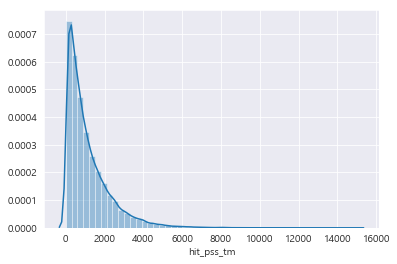

In [40]:
sns.distplot(np.round(tmp_sub2.hit_pss_tm / 1000))

In [51]:
tmp_sub2[tmp_sub2.buy_am != -1].buy_am.astype(int).describe()

count    1.385300e+04
mean     3.820909e+04
std      1.486879e+05
min      0.000000e+00
25%      3.490000e+03
50%      7.990000e+03
75%      3.590000e+04
max      1.050000e+07
Name: buy_am, dtype: float64

In [44]:
tmp_sub2.shape

(47407, 31)

In [52]:
tmp_sub2[tmp_sub2.buy_am != -1].buy_am.astype(int).quantile([.1, .25, .5 , .75, .9, .99])

0.10      1990.0
0.25      3490.0
0.50      7990.0
0.75     35900.0
0.90     83560.0
0.99    449000.0
Name: buy_am, dtype: float64

In [54]:
tmp_sub2['hit_pss_tm'] = np.round(tmp_sub2.hit_pss_tm / 1000)

c:\python37\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy



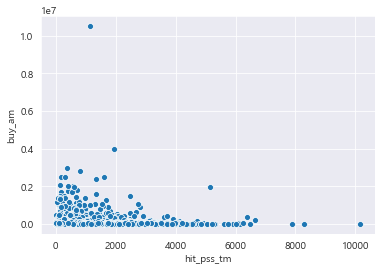

In [63]:
sns.scatterplot(data = tmp_sub2[(tmp_sub2.buy_am != -1) & (tmp_sub2.buy_am > 10000)], x = 'hit_pss_tm', y = 'buy_am')

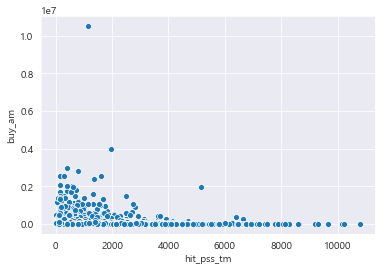

In [56]:
sns.scatterplot(data = tmp_sub2[tmp_sub2.buy_am != -1], x = 'hit_pss_tm', y = 'buy_am')

In [61]:
tmp_sub2[tmp_sub2.buy_am != -1].corr()
#총 구매가격과 구매까지 걸리는 시간간에 상관성은 거의 없는 듯함

,clnt_id,sess_id,hit_seq,action_type,sess_dt,hit_pss_tm,trans_id,tot_pag_view_ct,tot_sess_hr_v,year,month,day,weekday,hour,min,trans_seq,pd_c,buy_am,buy_ct,is_buying
clnt_id,1.000000,0.028137,0.038421,NaN,0.005104,0.012392,0.006864,-0.039038,0.010308,NaN,0.004131,0.008956,0.002231,0.031175,0.007840,0.033106,-0.007667,-0.021560,0.007317,NaN
sess_id,0.028137,1.000000,0.075674,NaN,0.321058,0.082611,0.331771,0.112557,0.108085,NaN,0.309573,0.106782,-0.001926,0.013208,-0.012357,0.068283,-0.028355,-0.043430,0.007189,NaN
hit_seq,0.038421,0.075674,1.000000,NaN,0.035553,0.670405,0.035088,0.651957,0.616801,NaN,0.032539,0.027820,-0.029650,0.006628,0.022313,0.399739,-0.027545,-0.161047,-0.007121,NaN
action_type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
sess_dt,0.005104,0.321058,0.035553,NaN,1.000000,0.031601,0.972515,0.005413,0.028795,NaN,0.994073,0.058552,0.035067,0.022008,-0.013780,0.033589,0.016011,0.001698,0.009637,NaN
hit_pss_tm,0.012392,0.082611,0.670405,NaN,0.031601,1.000000,0.031579,0.616912,0.938330,NaN,0.029324,0.021034,-0.024205,0.015985,0.020271,0.277928,-0.021811,-0.095203,-0.001745,NaN
trans_id,0.006864,0.331771,0.035088,NaN,0.972515,0.031579,1.000000,0.004434,0.029400,NaN,0.941541,0.288422,0.041387,0.032865,-0.014446,0.028960,0.015324,0.004397,0.011716,NaN
tot_pag_view_ct,-0.039038,0.112557,0.651957,NaN,0.005413,0.616912,0.004434,1.000000,0.647779,NaN,0.004357,0.009720,-0.040324,-0.086180,0.023021,0.178792,-0.018353,-0.063227,-0.009069,NaN
tot_sess_hr_v,0.010308,0.108085,0.616801,NaN,0.028795,0.938330,0.029400,0.647779,1.000000,NaN,0.026576,0.020505,-0.012107,0.019023,0.022423,0.236142,-0.020089,-0.063358,-0.003573,NaN
year,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [2]:
tmp = pd.read_csv("main_access_time_2.csv")

,clnt_id,pattern
0,1,5
1,2,2
2,3,3
3,4,2
4,5,2
5,6,2
6,7,2
7,8,2
8,9,2
9,10,1


In [6]:
online_df = online_df.merge(tmp, how = "left")

In [10]:
tmp_df = online_df.groupby(["pattern","clac_nm3"]).size().reset_index().sort_values(["pattern",0], ascending = [1,0])

In [16]:
for i in range(1,7):
    globals()["tmp_df{}".format(i)] = tmp_df[tmp_df.pattern == i].head(30).iloc[:,1:2]
    
multi_table([tmp_df1,tmp_df2,tmp_df3,tmp_df4,tmp_df5,tmp_df6])

,clac_nm3
47,Chicken Eggs
348,Tofu
296,Ramens
362,Water
121,Fresh Milk
126,Frozen Fried Foods
147,General Snacks
332,Spoon Type Yogurts
306,Sausages
400,Women's Underwear Sets
